In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('weatherAUS.csv')
# Select numeric columns only
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
numeric_columns = df.select_dtypes(include=[int, float]).columns

# Calculate the mean of each numeric column
mean_values = df[numeric_columns].mean()

# Replace NaN values in numeric columns with the mean of that column
df[numeric_columns] = df[numeric_columns].fillna(mean_values)
df.head()
# Now 'df' will have NaN values replaced with the mean of their respective numeric columns

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [4]:
y = df['RainTomorrow']

In [5]:
windire9am = pd.get_dummies(df['WindDir9am'],drop_first=True)
windire9am = windire9am.astype(int)
windgustdir = pd.get_dummies(df['WindGustDir'],drop_first=True).astype(int)
raintoday = pd.get_dummies(df['RainToday'],drop_first=True).astype(int)
windDir3pm = pd.get_dummies(df['WindDir3pm'],drop_first=True).astype(int)
df = pd.concat([df,windire9am,windgustdir,raintoday,windDir3pm],axis=1)


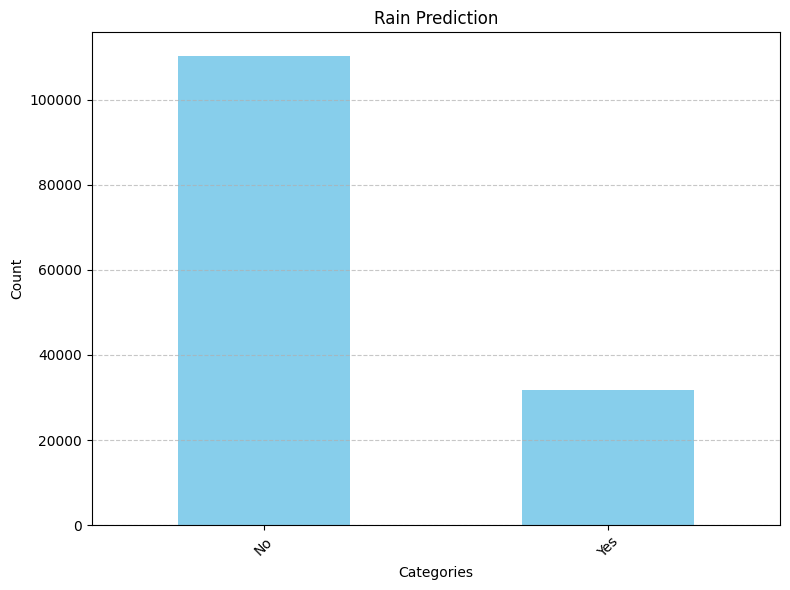

In [6]:
z = y.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
z.plot(kind='bar', color='skyblue')
plt.title('Rain Prediction')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
y = pd.get_dummies(y,drop_first=True).astype(int)


In [8]:
col = ['Location','Date','RainTomorrow','WindDir3pm','RainToday','WindGustDir','WindDir9am']
X = df.drop(columns=col)

In [9]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=0,test_size=0.2)


In [11]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[ 1.03785278,  0.06936361, -0.25738419, ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [-0.4542541 ,  0.11170569, -0.25738419, ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [-0.20295189, -0.14234677, -0.1153266 , ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       ...,
       [ 0.75513779,  0.93031916, -0.28106045, ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [-0.04588801, -0.17057482,  0.16878858, ..., -0.27292279,
         3.94732342, -0.2635723 ],
       [-0.03018162, -0.91861817, -0.18635539, ..., -0.27292279,
        -0.25333622, -0.2635723 ]])

In [13]:
X_test

array([[ 1.52475081,  2.2852656 , -0.09165033, ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [ 1.30486138,  2.01709912, -0.28106045, ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [-1.11392241, -0.84804804, -0.25738419, ...,  3.66403999,
        -0.25333622, -0.2635723 ],
       ...,
       [-0.25007106, -1.1021005 ,  0.4292275 , ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [ 1.00644   ,  0.52101242, -0.28106045, ..., -0.27292279,
        -0.25333622, -0.2635723 ],
       [-0.81550103, -0.90450414, -0.28106045, ..., -0.27292279,
        -0.25333622, -0.2635723 ]])

In [14]:
X_train.shape

(116368, 62)

In [15]:
y_train.shape

(116368, 1)

In [16]:
X_test.shape

(29092, 62)

In [17]:
y_test.shape

(29092, 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU
from tensorflow.keras.layers import Dropout

In [26]:
classifier = Sequential()
classifier.add(Dense(units=62,activation='relu'))


In [27]:
classifier.add(Dense(units=32,activation='relu'))
# Add second hidden layer
classifier.add(Dense(units=33,activation='relu'))

In [28]:
classifier.add(Dense(1,activation='sigmoid'))

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights = True)

In [33]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=[early_stopping])

Epoch 1/100


7797/7797 [==============================] - 62s 7ms/step - loss: 0.3657 - accuracy: 0.8406 - val_loss: 0.3548 - val_accuracy: 0.8455
Epoch 2/100
7797/7797 [==============================] - 27s 3ms/step - loss: 0.3494 - accuracy: 0.8481 - val_loss: 0.3545 - val_accuracy: 0.8480
Epoch 3/100
7797/7797 [==============================] - 19s 2ms/step - loss: 0.3437 - accuracy: 0.8512 - val_loss: 0.3519 - val_accuracy: 0.8466
Epoch 4/100
7797/7797 [==============================] - 17s 2ms/step - loss: 0.3392 - accuracy: 0.8527 - val_loss: 0.3509 - val_accuracy: 0.8478
Epoch 5/100
7797/7797 [==============================] - 17s 2ms/step - loss: 0.3363 - accuracy: 0.8547 - val_loss: 0.3500 - val_accuracy: 0.8480
Epoch 6/100
7797/7797 [==============================] - 17s 2ms/step - loss: 0.3326 - accuracy: 0.8558 - val_loss: 0.3498 - val_accuracy: 0.8501
Epoch 7/100
7797/7797 [==============================] - 18s 2ms/step - loss: 0.3301 - accuracy: 0.8570 - val_loss: 0.3493

In [35]:
loss,acc = classifier.evaluate(X_test,y_test)

910/910 [==============================] - 1s 1ms/step - loss: 0.3503 - accuracy: 0.8487
